**Plotting indicators by region**

In [ ]:
indicator_paths = ['/content/PBD_transformed.csv', '/content/USD_transformed.csv', '/content/UWD_transformed.csv']

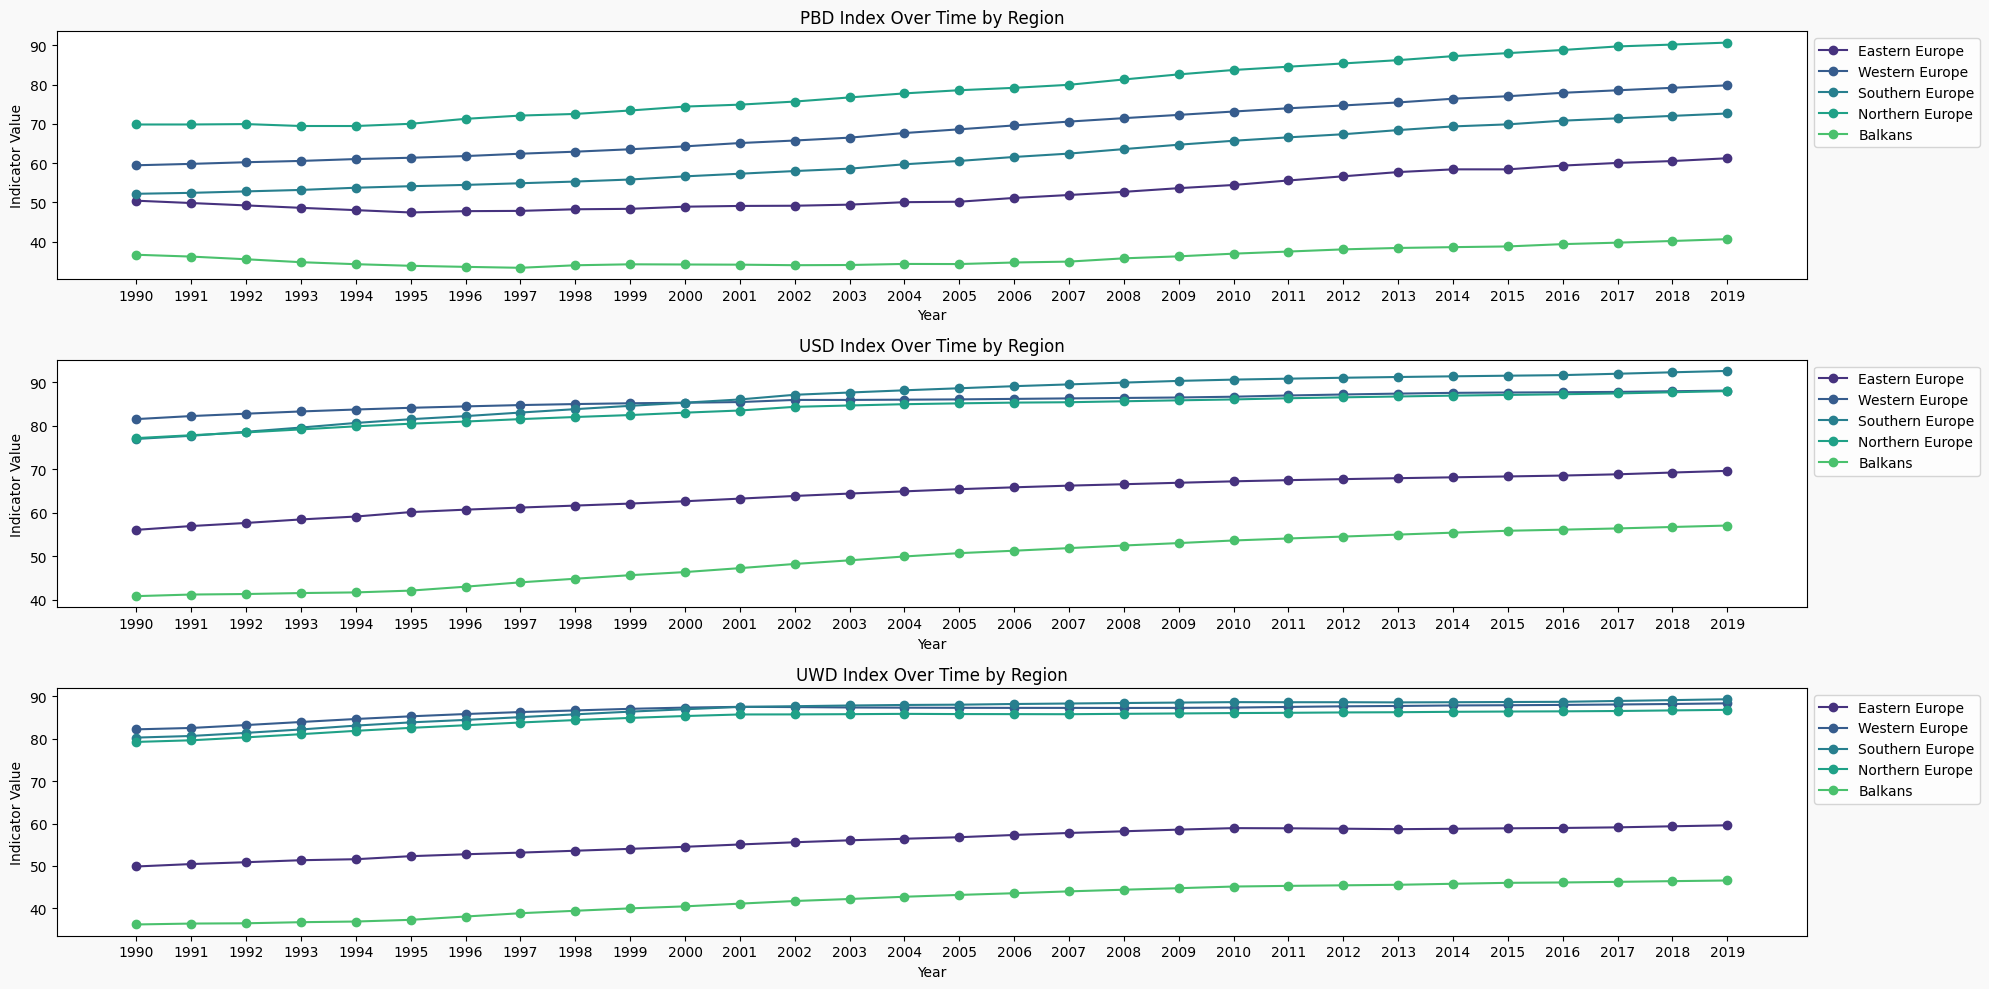

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define regions
regions = {
    'Eastern Europe': ['BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'SVK', 'UKR'],
    'Western Europe': ['AND', 'AUT', 'BEL', 'FRA', 'DEU', 'LIE', 'LUX', 'MCO', 'NLD', 'CHE'],
    'Southern Europe': ['HRV', 'CYP', 'GRC', 'ITA', 'MLT', 'PRT', 'SMR', 'SVN', 'ESP'],
    'Northern Europe': ['DNK', 'EST', 'FIN', 'ISL', 'IRL', 'LVA', 'LTU', 'NOR', 'SWE', 'GBR'],
    'Balkans': ['BIH', 'XKX', 'MNE', 'MKD', 'SRB'],
}

# Set seaborn color palette to 'viridis'
sns.set_palette("viridis")

# Plotting one plot for each indicator containing all regions
indicators = ['PBD', 'USD', 'UWD']
fig, axes = plt.subplots(nrows=len(indicators), ncols=1, figsize=(20, 10))

for j, indicator_path in enumerate(indicator_paths):
    # Read data from CSV
    df = pd.read_csv(indicator_path, index_col=0)

    for region, isos in regions.items():
        # Extract data for the specified region
        region_data = df.loc[isos].mean()

        # Plotting line for the region with dots (markers)
        axes[j].plot(region_data.index, region_data.values, label=region, marker='o')

    # Set titles and labels for each subplot
    axes[j].set_title(f'{indicators[j]} Index Over Time by Region')
    axes[j].set_xlabel('Year')
    axes[j].set_ylabel('Indicator Value')
    axes[j].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()

# Set background color for the entire figure
fig.patch.set_facecolor('#F9F9F9')

plt.show()

# **Water and Sanitation indicators**

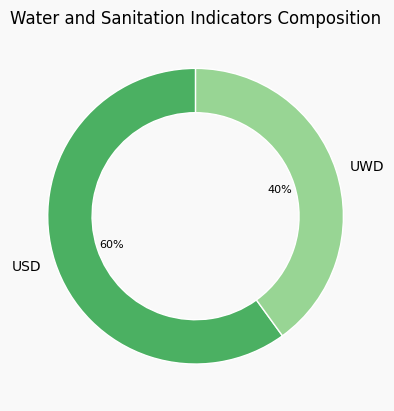

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Indicator weights
weights = {'USD': 60,'UWD': 40}

# Labels and values for the pie chart
labels = list(weights.keys())
values = list(weights.values())

# Normalize values to get darker colors for larger values
normalized_values = [v / sum(values) for v in values]

# Plotting the pie chart with colors based on values
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w', linewidth=1),
    colors=plt.cm.Greens(normalized_values)  # Use the normalized values for color mapping
)

# Adjusting the font size for better readability
for autotext in autotexts:
    autotext.set_fontsize(8)

# Adding a title
ax.set_title('Water and Sanitation Indicators Composition')

# Set background color
fig.patch.set_facecolor('#F9F9F9')

# Save the plot
plt.savefig("Water and Sanitation indicators composition.png", bbox_inches='tight')
plt.show()

**Renewable Water sources distribution in Europe**

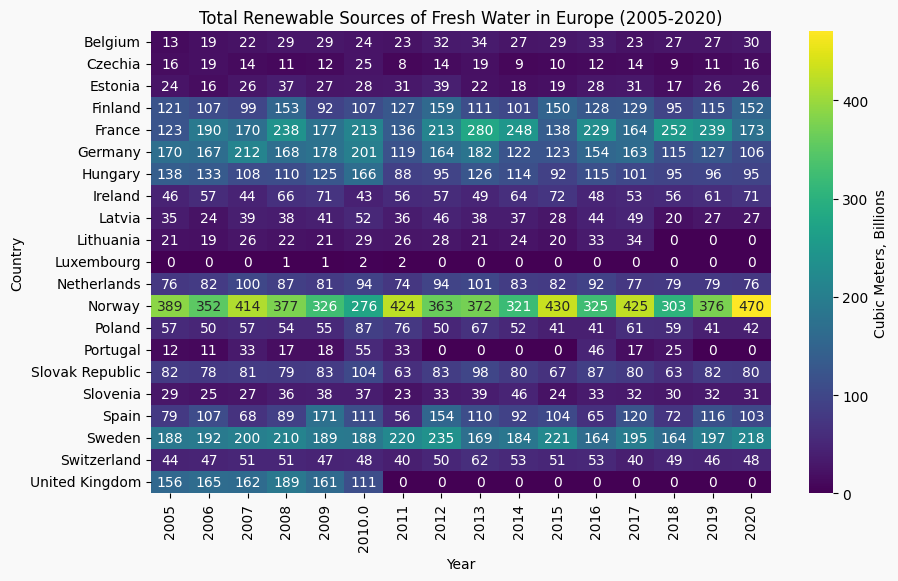

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("/content/Fresh water sources in Europe OECDstat.xlsx")

# Set the column headers based on the values in the first row
df.columns = df.iloc[0]

# Drop the first row as it's now the column headers
df = df[1:]

# Convert all headers to strings
df.columns = df.columns.astype(str)

# Remove the .0 in columns 4, 5, and 6
new_columns = [col.replace('.0', '') if col in df.columns[3:6] else col for col in df.columns]
df.columns = new_columns

# Replacing missing data
df.replace('..', 0, inplace=True)

# Set the country column as the index
df.set_index(df.columns[0], inplace=True)

# Convert data to numeric (in case they are read as strings)
df = df.apply(pd.to_numeric, errors='coerce')

# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap_plot = sns.heatmap(df, cmap="viridis", annot=True, fmt=".0f", cbar_kws={'label': 'Cubic Meters, Billions'})

# Set background color
heatmap_plot.get_figure().patch.set_facecolor('#F9F9F9')

# Customize labels and title
plt.title('Total Renewable Sources of Fresh Water in Europe (2005-2020)')
plt.xlabel('Year')
plt.ylabel('Country')

# Show the plot
plt.show()

**Water usage by counrty**

<ipython-input-39-2f66db7f82cd>:22: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



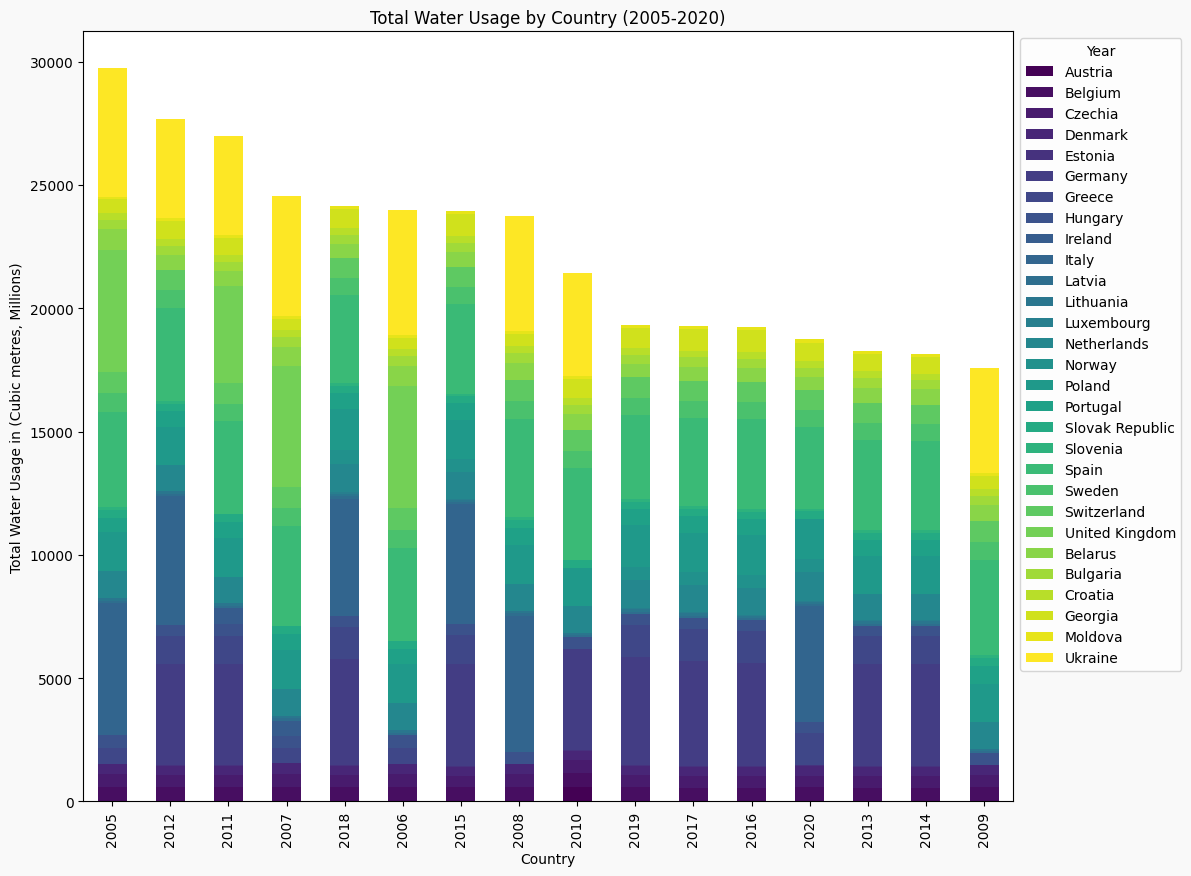

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df1 = pd.read_excel("/content/Water usage Total OECDstat.xlsx")

# Transpose the DataFrame to swap rows and columns
df1 = df1.transpose()

# Reset the index to make years a regular column again
df1.reset_index(inplace=True)

# Set the first row as the column headers
df1.columns = df1.iloc[0]

# Drop the first row as it's now the column headers
df1 = df1[1:]

df1 = df1.fillna(0)

# Calculate total water usage for each year
df1['Total'] = df1.sum(axis=1)

# Sort the DataFrame based on the total water usage
df1_sorted = df1.sort_values(by='Total', ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(12, 10))
df1_sorted.drop(columns='Total').plot(kind='bar', x='Country', stacked=True, colormap='viridis', ax=ax)

# Set background color
fig.patch.set_facecolor('#F9F9F9')

plt.title('Total Water Usage by Country (2005-2020)')
plt.xlabel('Country')
plt.ylabel('Total Water Usage in (Cubic metres, Millions)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Water usage per sector 2017**

<ipython-input-40-533a015802bb>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-40-533a015802bb>:26: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



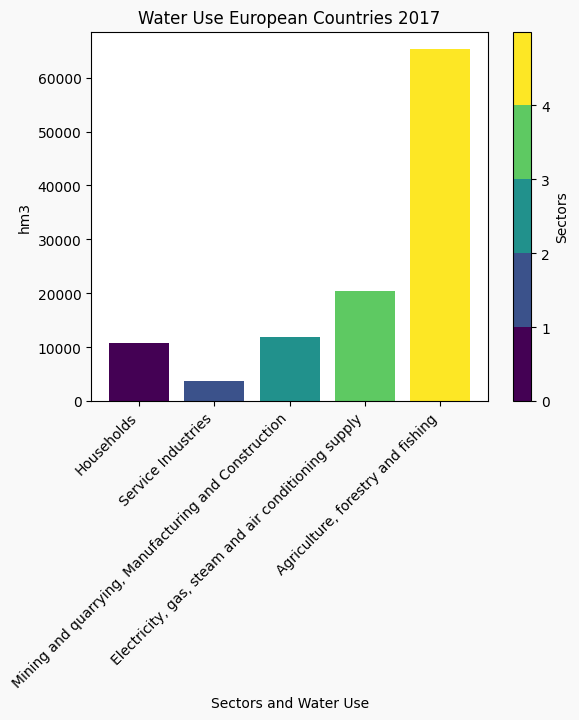

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

sectors = ['Households', 'Service Industries', 'Mining and quarrying, Manufacturing and Construction', 'Electricity, gas, steam and air conditioning supply', 'Agriculture, forestry and fishing']
water_use = [10732, 3676, 11909, 20389, 65286]

# Create a bar chart with rotated x-axis labels and 'viridis' colormap
fig, ax = plt.subplots()
cmap = get_cmap('viridis', len(sectors))
bars = ax.bar(sectors, water_use, color=cmap(range(len(sectors))))

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Set background color
fig.patch.set_facecolor('#F9F9F9')

# Add labels and title
plt.xlabel('Sectors and Water Use')
plt.ylabel('hm3')
plt.title('Water Use European Countries 2017')

# Add colorbar for better understanding of the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(sectors)))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=[i for i in range(len(sectors))])
cbar.set_label('Sectors')

# Show the plot
plt.show()

**Groundwater composition**

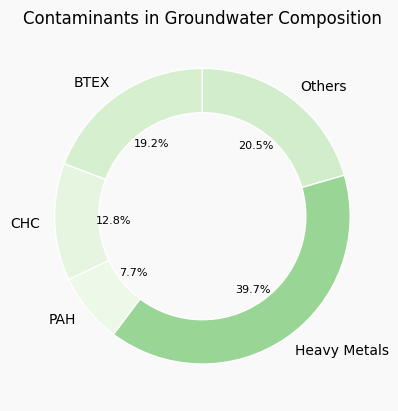

In [ ]:
import matplotlib.pyplot as plt

contaminants = ['BTEX', 'CHC', 'PAH', 'Heavy Metals', 'Others']
percentages = [15, 10, 6, 31, 16]

# Indicator weights
weights = dict(zip(contaminants, percentages))

# Normalize values to get darker colors for larger values
normalized_values = [v / sum(percentages) for v in percentages]

# Plotting the pie chart with colors based on values
fig, ax = plt.subplots()

# Set background color
fig.patch.set_facecolor('#F9F9F9')

wedges, texts, autotexts = ax.pie(
    percentages,
    labels=contaminants,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w', linewidth=1),
    colors=plt.cm.Greens(normalized_values)  # Use the normalized values for color mapping
)

# Adjusting the font size for better readability
for autotext in autotexts:
    autotext.set_fontsize(8)

# Adding a title
ax.set_title('Contaminants in Groundwater Composition')

# Display the pie chart
plt.show()

**Water and Sanitation Indicators over Time in Europe**

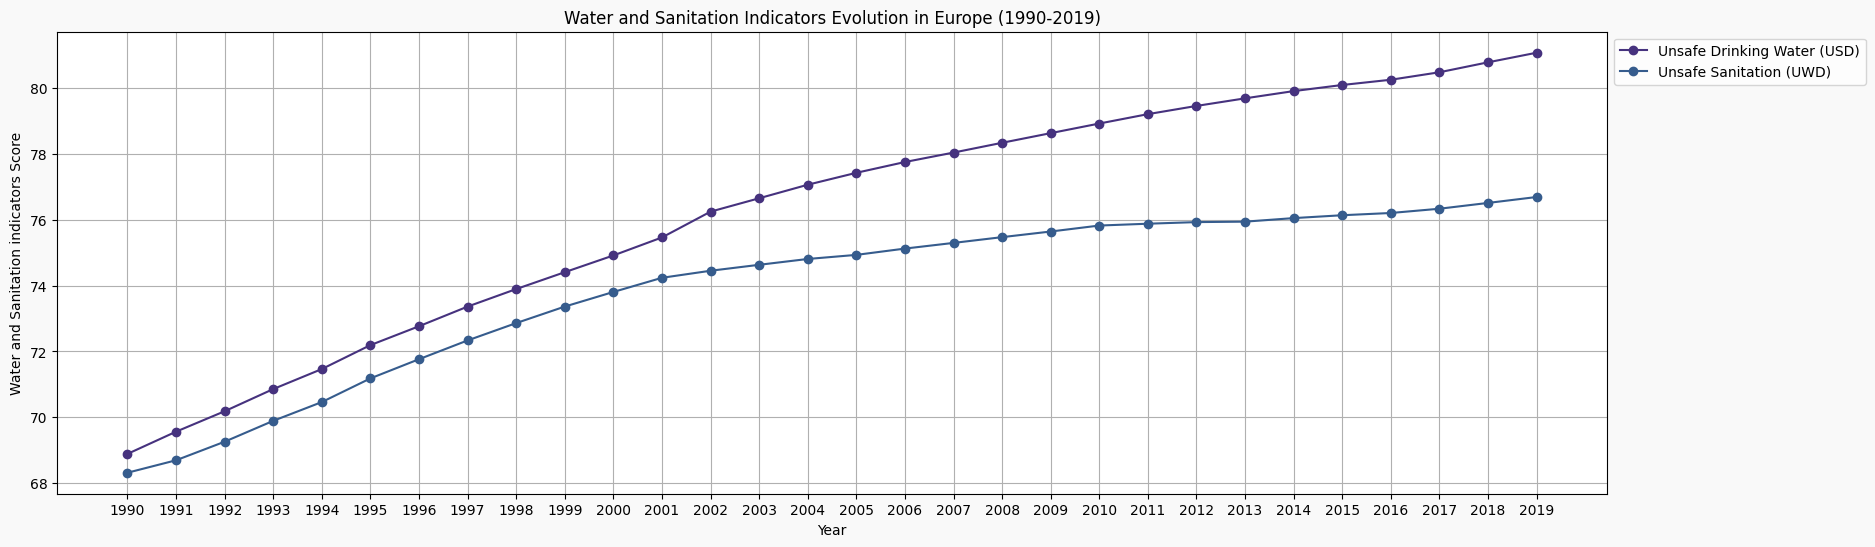

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn color palette to 'viridis'
sns.set_palette("viridis")

indicator_paths_water = ['/content/USD_transformed.csv', '/content/UWD_transformed.csv']

# Create an empty DataFrame to store mean values and slopes for each indicator
mean_and_slope_by_indicator = pd.DataFrame()

# Read each indicator dataset and calculate the mean for each year
for file_path in indicator_paths_water:
    indicator_df = pd.read_csv(file_path, index_col=0)
    mean_and_slope_by_indicator[file_path] = indicator_df.mean()

# Calculate the slope for each indicator and store it in a new DataFrame
slopes_by_indicator = pd.DataFrame()

for column in mean_and_slope_by_indicator.columns:
    x_values = np.arange(len(mean_and_slope_by_indicator.index))
    y_values = mean_and_slope_by_indicator[column].values
    slope = np.polyfit(x_values, y_values, 1)[0]  # 1 indicates a linear fit (slope)
    slopes_by_indicator[column] = [slope]

# Plot a separate line plot for each indicator with the slope value
fig, ax = plt.subplots(figsize=(20, 6))

for column in mean_and_slope_by_indicator.columns:
    ax.plot(mean_and_slope_by_indicator.index, mean_and_slope_by_indicator[column], label=f"{column} (Rate: {slopes_by_indicator[column].values[0]:.4f})", marker='o')

# Set titles and labels for the plot
ax.set_xlabel('Year')
ax.set_ylabel('Water and Sanitation indicators Score')
ax.set_title('Water and Sanitation Indicators Evolution in Europe (1990-2019)')

# Add legend
legend_labels = ['Unsafe Drinking Water (USD)', 'Unsafe Sanitation (UWD)']
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Set background color for the entire figure
fig.patch.set_facecolor('#F9F9F9')

plt.grid(True)
plt.show()

**Water Sanitation score**

In [ ]:
import plotly.express as px
import pandas as pd

result_water = pd.read_csv('/content/sanitation&water_score.csv')

# Drop the 'iso' column
result_water = result_water.drop('iso', axis=1)
# Drop columns with all 0 values
result_water = result_water.loc[:, (result_water != 0).any(axis=0)]

countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
    'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

result_water.index = countries
result_water = result_water.rename_axis("country", axis="index")
# Drop specific rows
rows_to_drop = ['Norway', 'Netherlands']
result_water = result_water.drop(rows_to_drop, axis=0)

def visualize_WS(df, year):
    # Create a choropleth map using plotly
    fig = px.choropleth(df,
                        locations=df.index,
                        locationmode="country names",
                        color_continuous_scale="Viridis",
                        color=year,
                        hover_name=df.index,
                        title=f"Water and Sanitation ({year}) - European Countries",
                        range_color=[df[year].min(), df[year].max()])

    # Show the map
    fig.show()

# Example usage:
# Assuming your DataFrame is named 'result' and contains European countries only
# You can change the year as needed
visualize_WS(result_water, str(1990))
visualize_WS(result_water, str(2019))

In [ ]:
import plotly.express as px

# Melt the DataFrame to have a 'Country' column and a 'Score' column
melted_df = result_water.reset_index().melt(id_vars='country', var_name='Year', value_name='Score')

# Calculate the average score for each country across all years
average_score = melted_df.groupby('country')['Score'].mean().reset_index()

# Sort the DataFrame by average score
sorted_countries = average_score.sort_values(by='Score', ascending=False)['country'].tolist()

# Apply the sorted order to the melted DataFrame
melted_df['country'] = pd.Categorical(melted_df['country'], categories=sorted_countries, ordered=True)

# Sort the melted DataFrame by score for each year
sorted_df = melted_df.sort_values(by=['country', 'Year'])

# Create a bar chart using plotly
fig = px.bar(sorted_df, x='country', y='Score', color="Year",
             title='Water and Sanitation Scores ranking - European Countries',
             labels={'Score': 'Water and Sanitation Score'},
             color_continuous_scale='Vidis')

# Set background color for the entire chart
fig.update_layout(
    plot_bgcolor="#F9F9F9",
    paper_bgcolor="#F9F9F9"
)

# Show the chart
fig.show()

# **Heavy Metals:**

**Deaths analysis for heavy metals diseases**

<ipython-input-34-fe49249ab6a4>:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-34-fe49249ab6a4>:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




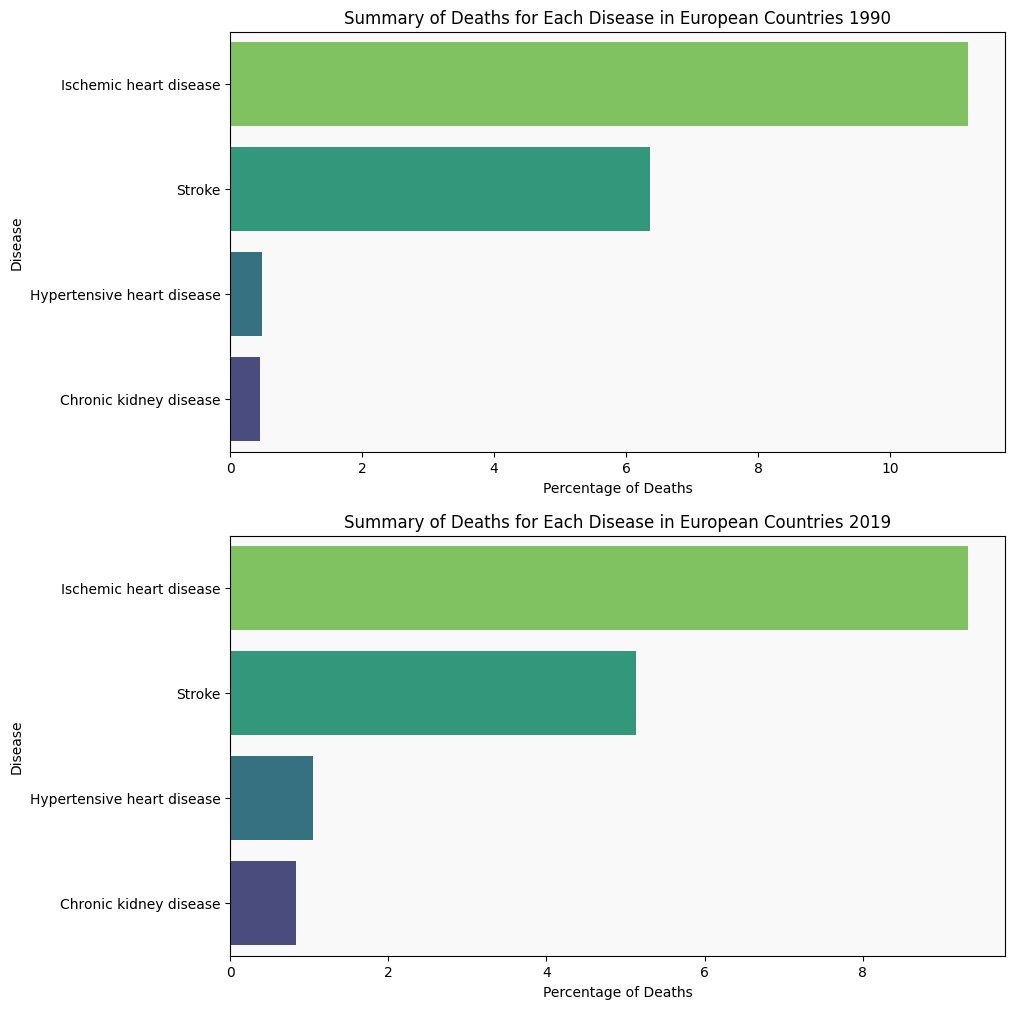

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
df_1990 = pd.read_excel("/content/Death causes 1990.xlsx")
df_2019 = pd.read_excel("/content/Death causes 2019.xlsx")

# Summarize the data by aggregating values for each 'cause_name'
df_summary_1990 = df_1990.groupby('cause_name')['val'].sum().reset_index().round(2)
df_summary_2019 = df_2019.groupby('cause_name')['val'].sum().reset_index().round(2)

# Sort values in descending order
df_summary_1990 = df_summary_1990.sort_values(by='val', ascending=False)
df_summary_2019 = df_summary_2019.sort_values(by='val', ascending=False)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

# Plot for 1990
pal_1990 = sns.color_palette("viridis", len(df_summary_1990))
sns.barplot(x='val', y='cause_name', data=df_summary_1990,
            ci=None, palette=np.array(pal_1990[::-1]), ax=axes[0])
axes[0].set_title('Summary of Deaths for Each Disease in European Countries 1990')
axes[0].set_xlabel('Percentage of Deaths')
axes[0].set_ylabel('Disease')
axes[0].patch.set_facecolor('#F9F9F9')

# Plot for 2019
pal_2019 = sns.color_palette("viridis", len(df_summary_2019))
sns.barplot(x='val', y='cause_name', data=df_summary_2019,
            ci=None, palette=np.array(pal_2019[::-1]), ax=axes[1])
axes[1].set_title('Summary of Deaths for Each Disease in European Countries 2019')
axes[1].set_xlabel('Percentage of Deaths')
axes[1].set_ylabel('Disease')
axes[1].patch.set_facecolor('#F9F9F9')

# Save the plot
plt.savefig("Deaths_heavy_metals_comparison.png", bbox_inches='tight')
plt.show()

**Heavy Metals Index Composition**

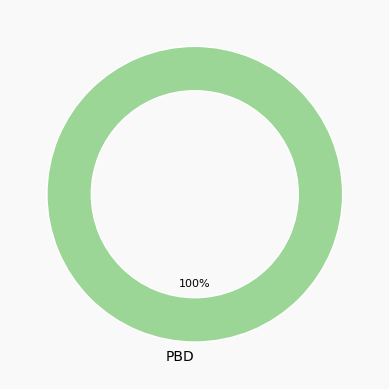

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Indicator weights
weights = {
    'PBD': 100}

# Labels and values for the pie chart
labels = list(weights.keys())
values = list(weights.values())

# Plotting the pie chart with colors based on values
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w', linewidth=1),
    colors=plt.cm.Greens(values)  # Use the normalized values for color mapping
)

# Adjusting the font size for better readability
for autotext in autotexts:
    autotext.set_fontsize(8)

# Set background color
fig.patch.set_facecolor('#F9F9F9')

# Save the plot
plt.savefig("Heavy Metals indicators composition.png", bbox_inches='tight')
plt.show()

**Heavy Metals Score:**
Which is the same as the indicator

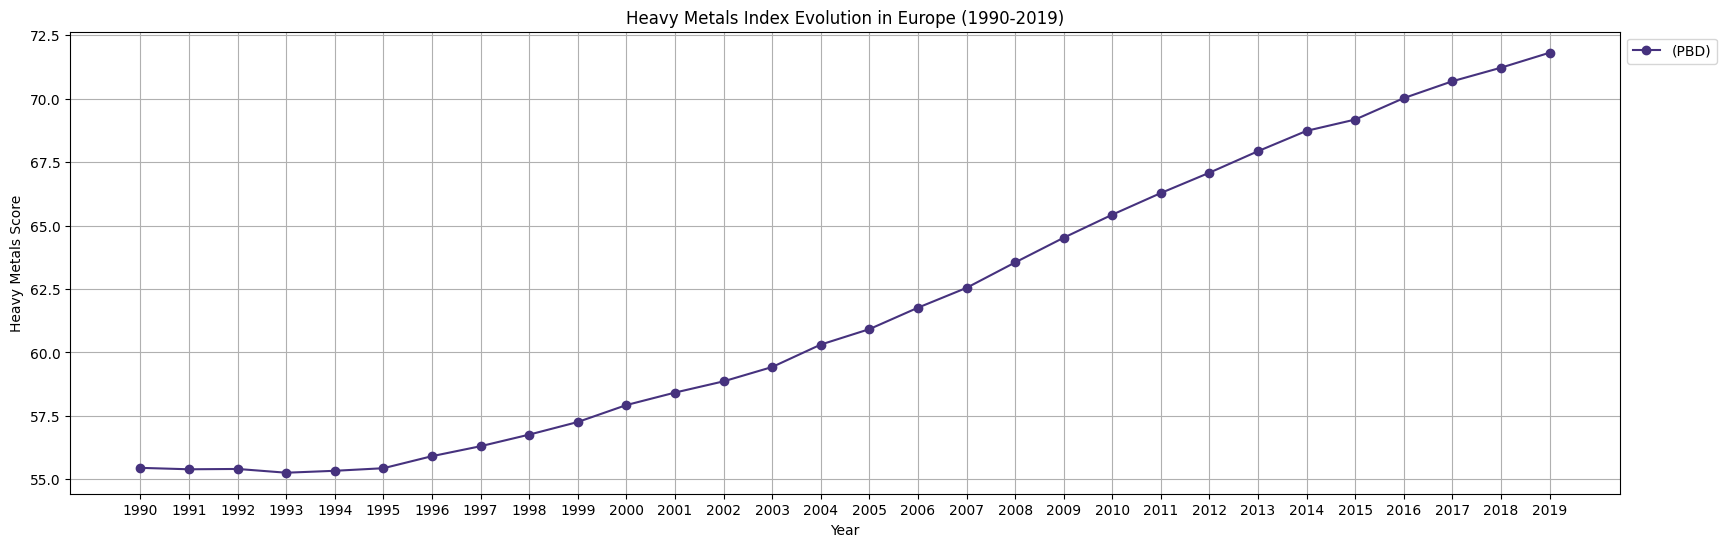

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn color palette to 'viridis'
sns.set_palette("viridis")

indicator_paths_metals = ['/content/PBD_transformed.csv']

# Create an empty DataFrame to store mean values and slopes for each indicator
mean_and_slope_by_indicator = pd.DataFrame()

# Read each indicator dataset and calculate the mean for each year
for file_path in indicator_paths_metals:
    indicator_df = pd.read_csv(file_path, index_col=0)
    mean_and_slope_by_indicator[file_path] = indicator_df.mean()

# Calculate the slope for each indicator and store it in a new DataFrame
slopes_by_indicator = pd.DataFrame()

for column in mean_and_slope_by_indicator.columns:
    x_values = np.arange(len(mean_and_slope_by_indicator.index))
    y_values = mean_and_slope_by_indicator[column].values
    slope = np.polyfit(x_values, y_values, 1)[0]  # 1 indicates a linear fit (slope)
    slopes_by_indicator[column] = [slope]

# Plot a separate line plot for each indicator with the slope value
plt.figure(figsize=(20, 6))

for column in mean_and_slope_by_indicator.columns:
    plt.plot(mean_and_slope_by_indicator.index, mean_and_slope_by_indicator[column], label=f"{column} (Rate: {slopes_by_indicator[column].values[0]:.4f})", marker='o')

plt.xlabel('Year')
plt.ylabel('Heavy Metals Score')
plt.title('Heavy Metals Index Evolution in Europe (1990-2019)')
legend_labels = ['(PBD)']
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
# Set background color for the entire figure
fig.patch.set_facecolor('#F9F9F9')

plt.grid(True)
plt.show()

**Maps Heavy Metals**

In [ ]:
import plotly.express as px
import pandas as pd

result_metals = pd.read_csv('/content/PBD_transformed.csv')

# Drop the 'iso' column
result_metals = result_metals.drop('iso', axis=1)
#

countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
    'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

result_metals.index = countries
result_metals = result_metals.rename_axis("country", axis="index")
# print(result_metals)
# Drop specific rows
rows_to_drop = ['Norway', 'Netherlands']
result_metals = result_metals.drop(rows_to_drop, axis=0)

def visualize_PBD(df, year):
    # Create a choropleth map using plotly
    fig = px.choropleth(df,
                        locations=df.index,
                        locationmode="country names",
                        color_continuous_scale="Viridis",
                        color=year,
                        hover_name=df.index,
                        title=f"Heavy Metals ({year}) - European Countries",
                        range_color=[df[year].min(), df[year].max()])

    # Show the map
    fig.show()

# Example usage:
# Assuming your DataFrame is named 'result' and contains European countries only
# You can change the year as needed
visualize_PBD(result_metals, str(1990))
visualize_PBD(result_metals, str(2019))

**Heavy Metals Indices Rankings by Countries over Time**

In [ ]:
import plotly.express as px

# Melt the DataFrame to have a 'Country' column and a 'Score' column
melted_df = result_metals.reset_index().melt(id_vars='country', var_name='Year', value_name='Score')

# Calculate the average score for each country across all years
average_score = melted_df.groupby('country')['Score'].mean().reset_index()

# Sort the DataFrame by average score
sorted_countries = average_score.sort_values(by='Score', ascending=False)['country'].tolist()

# Apply the sorted order to the melted DataFrame
melted_df['country'] = pd.Categorical(melted_df['country'], categories=sorted_countries, ordered=True)

# Sort the melted DataFrame by score for each year
sorted_df = melted_df.sort_values(by=['country', 'Year'])

# Create a bar chart using plotly
fig = px.bar(sorted_df, x='country', y='Score', color="Year",
             title='Heavy Metals Scores ranking - European Countries',
             labels={'Score': 'Heavy Metals Score'},
             color_continuous_scale='Vidis')

# Set background color for the entire chart
fig.update_layout(
    plot_bgcolor="#F9F9F9",
    paper_bgcolor="#F9F9F9"
)

# Show the chart
fig.show()